In [26]:
import pickle
import gzip

import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [14]:
def encode_label(j):
    """One hot encoding"""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [29]:
def shape_data(data):
    """Reshape input 2d arrays(28 x 28) to 1d arrays(784), encode labels(0-10) to one hot""" 
    features = [np.reshape(x, (784, 1)) for x in data[0]]
    labels = [encode_label(y) for y in data[1]]
    
    return [(f, l) for f, l in zip(features, labels)]

In [30]:
def load_data():
    with gzip.open('data/mnist.pkl.gz', 'rb') as f:
        train_data, validation_data, test_data = pickle.load(f, encoding='latin1')
        
    return shape_data(train_data), shape_data(validation_data), shape_data(test_data)

In [48]:
train, val , test = load_data()

In [32]:
def average_digit(data, digit):
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)

In [33]:
avg_eight = average_digit(train, 8)

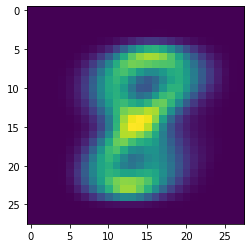

In [34]:
img = np.reshape(avg_eight, (28, 28))
plt.imshow(img)

In [37]:
x_3 = train[2][0]  # digit 4
x_18 = train[17][0]  # digit 8

W = np.transpose(avg_eight)
print(np.dot(W, x_3))
print(np.dot(W, x_18))

[[20.066475]]
[[54.196236]]


In [39]:
def sigmoid_double(x):
    return 1.0 / (1.0 + np.exp(-x))

In [40]:
def sigmoid(z):
    return np.vectorize(sigmoid_double)(z)

In [41]:
b = -45  # bias term

In [42]:
def predict(x, W, b):
    return sigmoid_double(np.dot(W, x) + b)

In [43]:
predict(x_3, W, b)

array([[1.484252e-11]], dtype=float32)

In [44]:
predict(x_18, W, b)

array([[0.99989855]], dtype=float32)

In [45]:
def evaluate(data, digit, threshold, W, b):
    total_samples = len(data)
    correct_predictions = 0
    for x in data:
        if predict(x[0], W, b) > threshold and np.argmax(x[1]) == digit:
            correct_predictions += 1
        if predict(x[0], W, b) <= threshold and np.argmax(x[1]) != digit:
            correct_predictions += 1
            
    return correct_predictions / total_samples

In [47]:
evaluate(data=train, digit=8, threshold=0.5, W=W, b=b)

0.68278

In [49]:
evaluate(data=val, digit=8, threshold=0.5, W=W, b=b)

0.706

In [50]:
evaluate(data=test, digit=8, threshold=0.5, W=W, b=b)

0.6735

In [51]:
eight_test = [x for x in test if np.argmax(x[1]) == 8]
evaluate(data=eight_test, digit=8, threshold=0.5, W=W, b=b)  # precision in a set containing only the digit 8

0.8121149897330595